In [4]:
import keras  
from keras.preprocessing.image import  ImageDataGenerator
from keras.models import  Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations  import ELU

num_classes  =  20
img_rows, img_cols = 32,32
batch_size = 16

train_data_dir = 'simpsons/train'
valid_data_dir = 'simpsons/validation'


# Perform data augmentation
train_datagen = ImageDataGenerator(
            rescale = 1./255,
    rotation_range = 30,
    width_shift_range  = 0.3,
    height_shift_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = 'categorical'
)


validation_generator = validation_datagen.flow_from_directory(
    valid_data_dir,
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = 'categorical'
)






Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [9]:
# Creating our own VGG model

model = Sequential()

# 1st CONV-Relu layer
model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())


# 2nd CONV-Relu layer
model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())


# Maxpooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


# 3rd CONV-Relu layer
model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())


# 4th CONV-Relu layer
model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())


# Maxpooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


# 5th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())


# 6th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())


# Maxpooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


# 1st Fully connected layer
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# 2nd Fully connected layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final dense layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)       

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


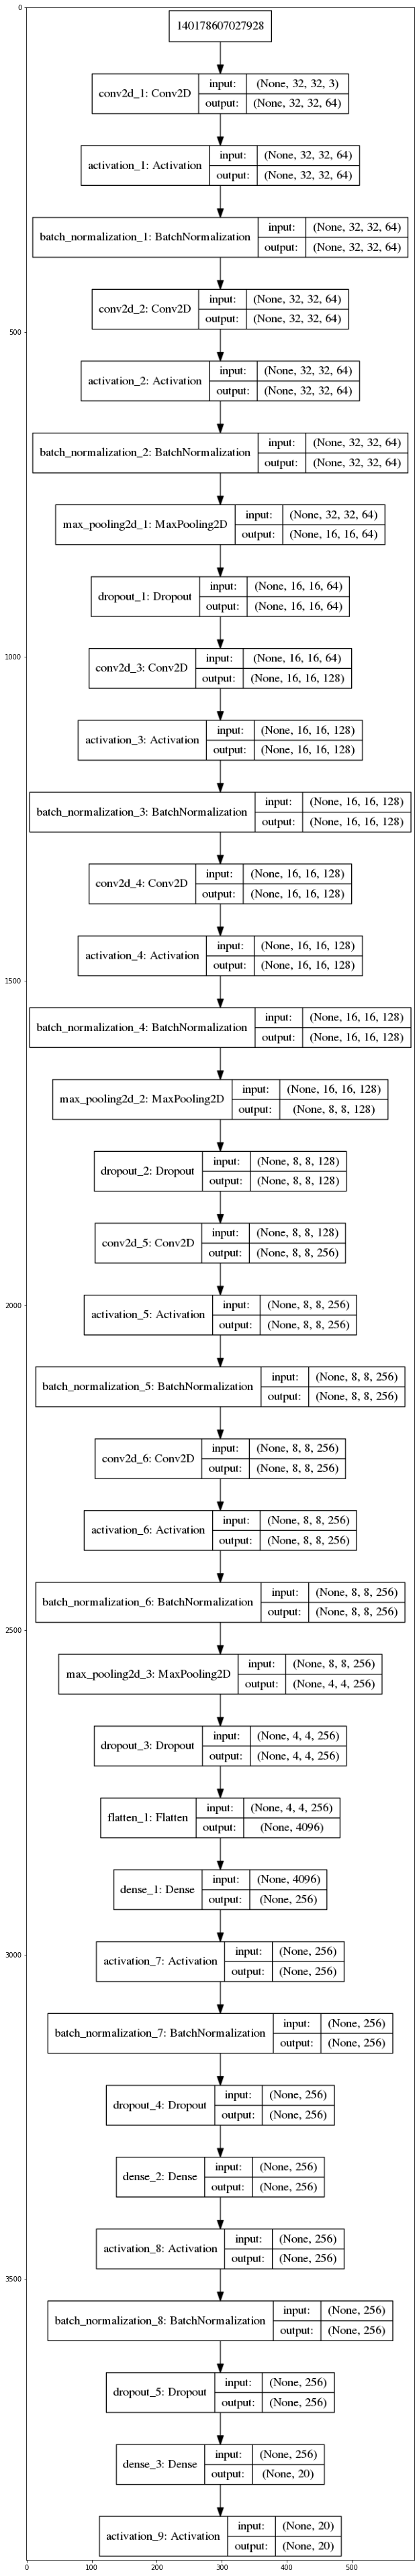

In [10]:
#  Lets look at our model
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file = 'littleVGG.png', show_shapes =  True, show_layer_names = True)
img =  mpimg.imread('littleVGG.png')
plt.figure(figsize=(100,70))
imgplot = plt.imshow(img)

In [12]:
#  Little VGG  classifier

from keras.optimizers import RMSprop,  Adam, SGD
from keras.callbacks import ModelCheckpoint,  EarlyStopping,  ReduceLROnPlateau

checkpoint  =  ModelCheckpoint('littleVGG.h5',
                              monitor  =  'val_loss',
                              mode =  'min',
                              save_best_only =  True,
                              verbose = 1)

earlystop = EarlyStopping(monitor  = 'val_loss',
                         min_delta  =  0,
                         patience =  3,
                         verbose = 1,
                         restore_best_weights =  True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)




# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]


model.compile(loss  = 'categorical_crossentropy',
             optimizer =  Adam(lr = 0.01),
             metrics =  ['accuracy'])


nb_train_samples = 19548
nb_validation_samples = 990
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1221/1221 [==============================] - ETA: 0s - loss: 2.7930 - accuracy: 0.1793
Epoch 00001: val_loss improved from inf to 2.42778, saving model to littleVGG.h5
1221/1221 [==============================] - 165s 135ms/step - loss: 2.7930 - accuracy: 0.1793 - val_loss: 2.4278 - val_accuracy: 0.2449 - lr: 0.0100
Epoch 2/10
1221/1221 [==============================] - ETA: 0s - loss: 2.1884 - accuracy: 0.3305
Epoch 00002: val_loss did not improve from 2.42778
1221/1221 [==============================] - 177s 145ms/step - loss: 2.1884 - accuracy: 0.3305 - val_loss: 2.6250 - val_accuracy: 0.2439 - lr: 0.0100
Epoch 3/10
1221/1221 [==============================] - ETA: 0s - loss: 1.8660 - accuracy: 0.4345
Epoch 00003: val_loss improved from 2.42778 to 2.15857, saving model to littleVGG.h5
1221/1221 [==============================] - 169s 139ms/step - loss: 1.8660 - accuracy: 0.4345 - val_loss: 2.1586

In [18]:
# Performance analysis

import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19548
nb_validation_samples = 990

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes) 

Found 990 images belonging to 20 classes.
Confusion Matrix
[[37  0  1  0  0  0  0  9  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 43  1  0  0  0  1  0  0  0  1  1  2  0  0  0  0  0  0]
 [ 0  1  8 28  0  0  0  1  0  0  0  4  3  0  0  2  0  0  1  0]
 [ 0  0  0  0 44  0  0  0  0  0  0  0  4  0  0  2  0  0  0  0]
 [ 0  0  2  0  5 19  0  4  0  1  0  1  4  2  2  2  3  3  1  0]
 [ 2  0  6  0  0  0 36  0  0  0  0  1  4  0  0  0  1  0  0  0]
 [ 1  0  2  0  0  0  0 45  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  1  0  2 13  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  2  0 41  0  0  5  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  7  0  0 31  0  0  0  0  1  6  0  0  2]
 [ 0  0  5  0  0  0  0  0  0  0  0 44  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  0  2  0  0  0  1  4 35  1  0  0  1  0  3]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  2  0 45  0  0  0  0 